<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Recommendation_Engine/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import datetime
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os
print(os.listdir("drive/MyDrive/Colab Notebooks"))

sns.set(style="ticks", color_codes=True)


['vehicles.csv', 'Lesson 5-SciKit Learn.ipynb', 'Lesson 4-Matplotlib.ipynb', 'Untitled0.ipynb', 'Lesson_3_Pandas.ipynb', 'Tutorial 3.ipynb', 'category_tree.csv', 'events.csv', 'item_properties_part1.csv', 'item_properties_part2.csv', 'Lesson 2-Numpy.ipynb', 'Untitled2.ipynb', 'Diabetes_data.csv', 'Tutorial 7.ipynb', 'news_json.json', 'Untitled1.ipynb', 'Huggingface1.ipynb']


Load the CSV file

In [ ]:
events = pd.read_csv('drive/MyDrive/Colab Notebooks/events.csv')
items=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part1.csv')
items1=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part2.csv')
items=pd.concat([items1,items])
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
items.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [ ]:
items.shape


(20275902, 4)

Get basic information about the dataset

In [ ]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [ ]:
events.shape


(2756101, 5)

In [ ]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [ ]:
events.isnull().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,2733644


Convert the Unix timestamp to a human-readable date format to analyze time patterns.

In [ ]:
import datetime

events['timestamp'] = pd.to_datetime(events['timestamp'] , unit='ms')

events[['timestamp']].head()

,timestamp
0,2015-06-02 05:02:12.117
1,2015-06-02 05:50:14.164
2,2015-06-02 05:13:19.827
3,2015-06-02 05:12:35.914
4,2015-06-02 05:02:17.106


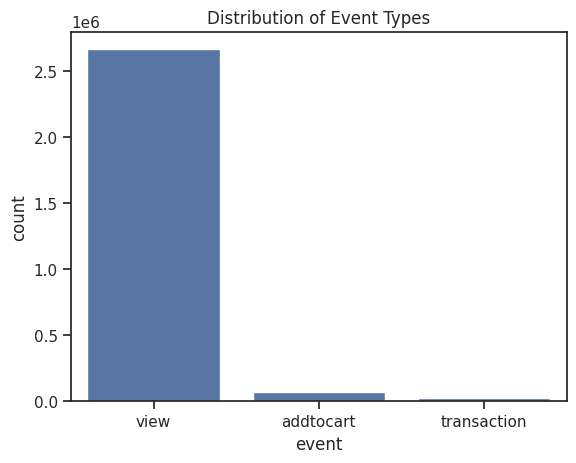

In [ ]:
# Frequency of each event type
event_counts = events['event'].value_counts()
event_counts


sns.countplot(data=events, x='event')
plt.title('Distribution of Event Types')
plt.show()



In [ ]:
# Sort by visitorid and timestamp to simulate session behavior
events = events.sort_values(by=['visitorid', 'timestamp'])

# Example of counting events per visitor to analyze engagement
visitor_event_counts = events.groupby('visitorid')['event'].count().sort_values(ascending=False)
visitor_event_counts.head()


,event
visitorid,
1150086,7757
530559,4328
152963,3024
895999,2474
163561,2410


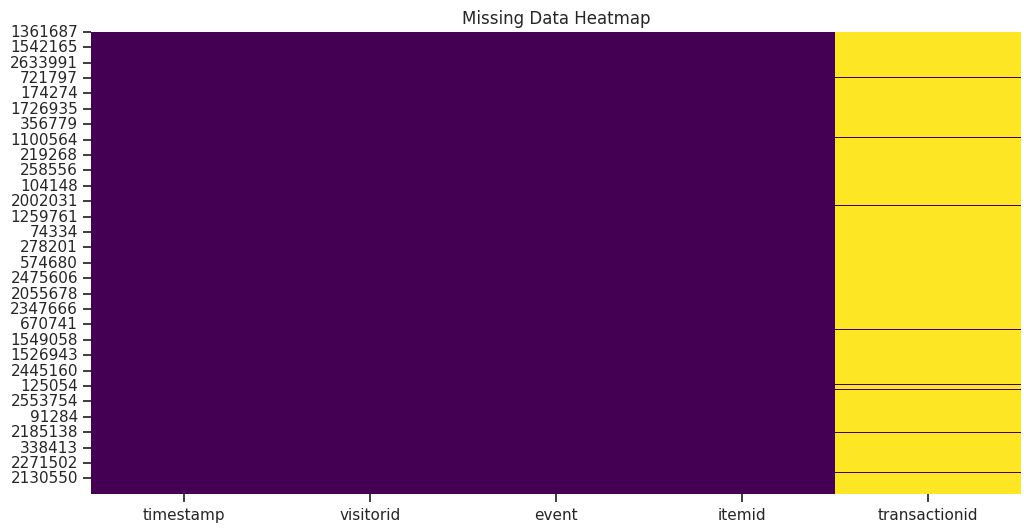

In [ ]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(events.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



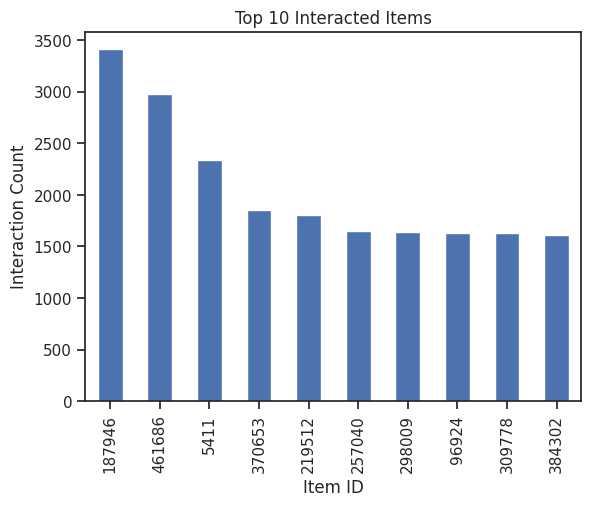

In [ ]:
# Count of interactions by item
item_interactions = events['itemid'].value_counts().head(10)
item_interactions

# Bar plot of most interacted items
item_interactions.plot(kind='bar')
plt.title('Top 10 Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Interaction Count')
plt.show()


In [ ]:
# Filter only transaction events
transactions = events[events['event'] == 'transaction']

# Count unique transactions
print("Number of unique transactions:", transactions['transactionid'].nunique())


Number of unique transactions: 17672


In [ ]:
visitors=events["visitorid"].unique()
print('Visitor count on actions:',events["visitorid"].shape)
print('Total unique visitors :',visitors.shape)
#unique visitors are almost half the number of total visitors

Visitor count on actions: (2756101,)
Total unique visitors : (1407580,)


In [ ]:
events["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [ ]:
print(events["transactionid"].dropna().unique().shape[0])
print(events["transactionid"].dropna().shape[0])

17672
22457


In [ ]:
print(events["itemid"].unique().shape)

(235061,)


As View count is too much, o get a clear idea over add-to-cart and transaction actions I created a seperate plot

event
addtocart      69332
transaction    22457
Name: count, dtype: int64


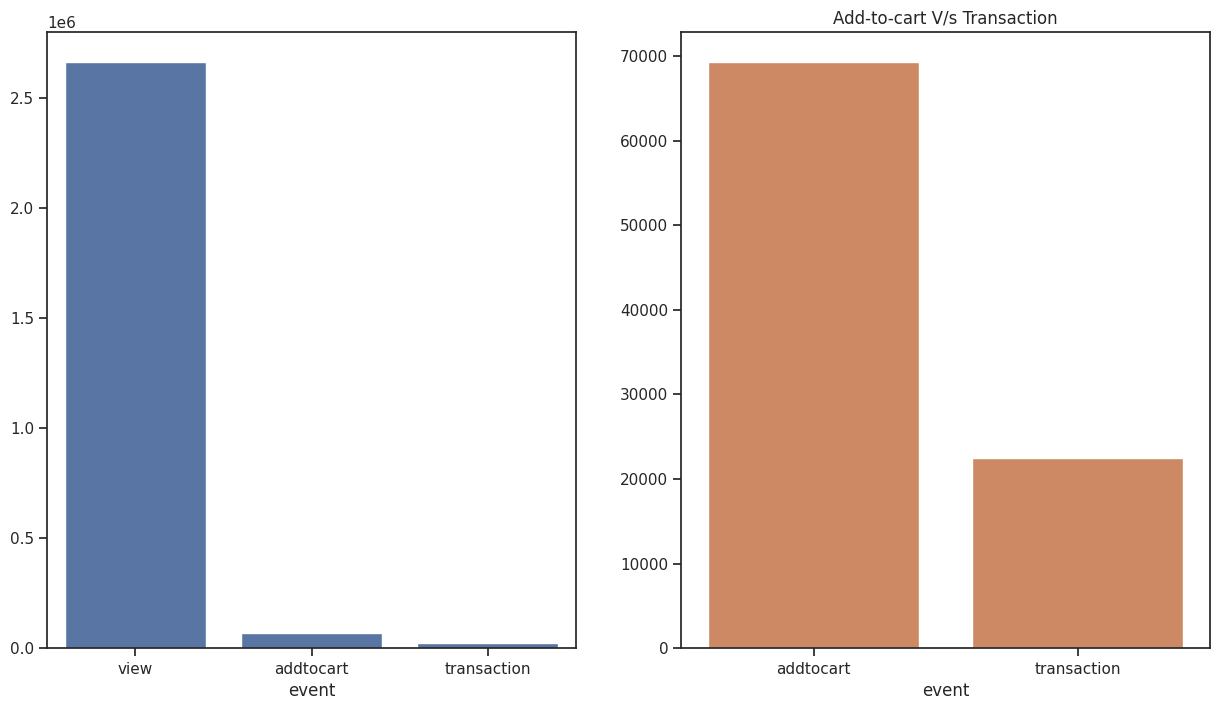

In [ ]:
events_count=events["event"].value_counts()
fig, axs = plt.subplots(ncols=2,figsize=(15, 8))
sns.barplot(x = events_count.index,y = events_count.values, ax=axs[0])

events_count=events["event"].value_counts()[1:]
#plt.title('Actions Vs Count')
g=sns.barplot(x = events_count.index,y = events_count.values,ax=axs[1])
#g.set_yscale('log')
events_count=events["event"].value_counts()[1:]
plt.title('Add-to-cart V/s Transaction')
sns.barplot(x = events_count.index, y = events_count.values)

print(events_count)

In [ ]:
grouped=events.groupby('event')['itemid'].apply(list)

<ipython-input-21-a7eefee94ceb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[i[0] for i in sorted_count_view[:5]],


<Axes: >

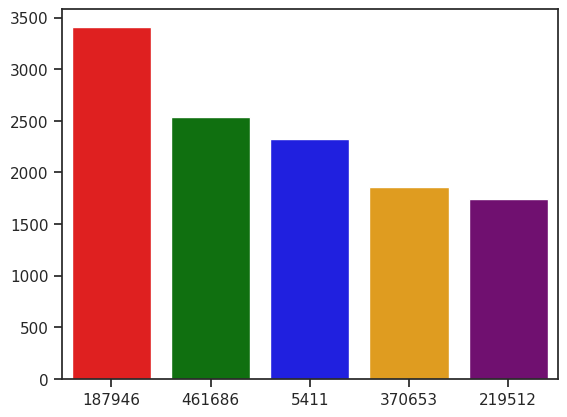

In [ ]:
import operator

views = grouped['view']
count_view = {}
views = np.array(views[:])

unique, counts = np.unique(views, return_counts=True)
count_view = dict(zip(unique, counts))
sorted_count_view = sorted(count_view.items(), key=operator.itemgetter(1), reverse=True)

# Specify colors for the bars
colors = ['red', 'green', 'blue', 'orange', 'purple']  # Adjust as needed

x = [i[0] for i in sorted_count_view[:5]]

# Create the bar plot with custom colors
sns.barplot(x=[i[0] for i in sorted_count_view[:5]],
            y=[i[1] for i in sorted_count_view[:5]],
            order=x,  # Ensure correct order
            palette=colors)


<ipython-input-22-a47a2cbd4ffc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=[i[0] for i in sorted_count_addtocart[:5]],


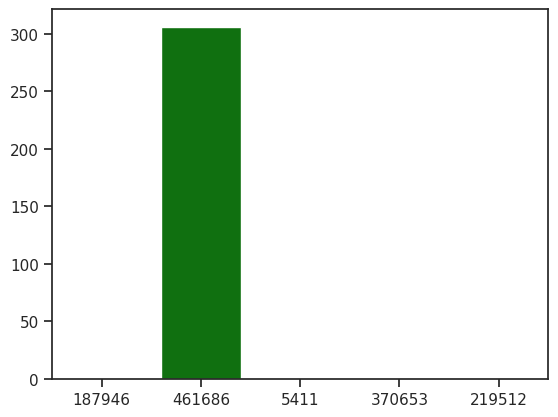

In [ ]:
#the most addtocart itemid
addtocart=grouped['addtocart']
count_addtocart={}
# for item in set(addtocart[:]):
#     #print(item)
#     count_addtocart[item]=addtocart.count(item)
addtocart=np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart=dict(zip(unique, counts))

sorted_count_addtocart =sorted(count_addtocart.items(), key=operator.itemgetter(1),reverse=True)

g=sns.barplot(x=[i[0] for i in sorted_count_addtocart[:5]],
              y=[i[1] for i in sorted_count_addtocart[:5]],
              order=x, palette=colors)

<ipython-input-23-e2c0c280c5af>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transactions.index,


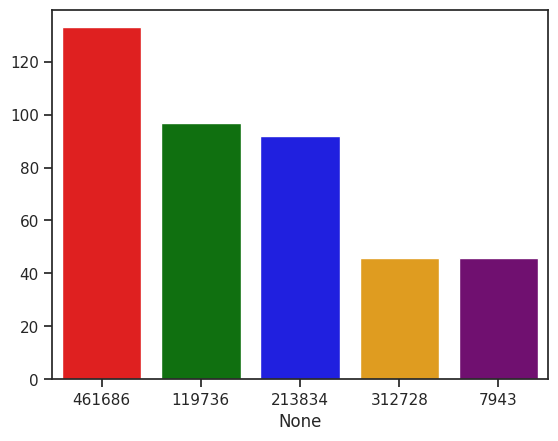

In [ ]:
# Extract transaction data and convert to pandas Series
transactions = pd.Series(grouped['transaction'])

# Count transaction occurrences using pandas value_counts
transaction_counts = transactions.value_counts()

# Get the top 5 most frequent transactions
top_transactions = transaction_counts.head(5)

# Define custom colors (if desired)
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar plot
sns.barplot(x=top_transactions.index,
            y=top_transactions.values,
            order=top_transactions.index,  # Maintain order
            palette=colors)  # Apply custom colors

plt.show()  # Display the plot

In [ ]:
category_tree = pd.read_csv('drive/MyDrive/Colab Notebooks/category_tree.csv')
category_tree.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


Category IDs explain the relationship of different products with each other e.g. Category ID 1016 is a child of Parent ID 213.

Below shows the number of items under category id 1016

In [ ]:
items.loc[(items.property=='categoryid')&(items.value == '1016')].sort_values('timestamp').head()


,timestamp,itemid,property,value
829553,1431226800000,195160,categoryid,1016
7236969,1431226800000,6777,categoryid,1016
7427595,1431226800000,388663,categoryid,1016
7440982,1431226800000,146577,categoryid,1016
10230975,1431226800000,85538,categoryid,1016


In [ ]:
items_new = items.loc[items.property.isin(['categoryid', 'available']), :]
print("items with categoryid and available as propery:", items_new.size)
items_new.head(20)

items with categoryid and available as propery: 9167412


,timestamp,itemid,property,value
15,1431226800000,8921,categoryid,1188
31,1433041200000,352564,available,0
43,1431831600000,106601,available,0
65,1437274800000,17166,available,1
70,1433041200000,122405,categoryid,769
93,1431831600000,290397,available,0
104,1441508400000,125061,available,0
132,1440298800000,379701,available,0
135,1435460400000,455350,available,1
146,1432436400000,138907,available,0


In [ ]:
#analyzing 461686 itemid
events.loc[(events.itemid==461686)]

,timestamp,visitorid,event,itemid,transactionid
345382,2015-06-17 15:27:17.567,973,view,461686,NaN
884001,2015-08-17 02:17:17.574,2857,view,461686,NaN
889314,2015-08-17 02:19:11.485,2857,view,461686,NaN
883959,2015-08-17 02:23:46.106,2857,view,461686,NaN
876938,2015-08-17 02:24:27.001,2857,view,461686,NaN
...,...,...,...,...,...
1020096,2015-08-24 18:14:28.661,1403914,view,461686,NaN
1022287,2015-08-24 18:14:31.670,1403914,view,461686,NaN
1035463,2015-08-24 18:14:32.056,1403914,view,461686,NaN
1031450,2015-08-24 18:14:32.127,1403914,view,461686,NaN


 lets offer visitor a list of items of what previous visitors bought TOGETHER with the item they are currently viewing. This way we can guide them in their buying journey

In [ ]:
# first - lets create a list of visitors who made a purchase
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()

#lets create a list of purchased items
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))

In [ ]:
purchased_items

[[465522, 10034],
 [49029],
 [459835, 161949],
 [19278],
 [94371],
 [414182],
 [207825],
 [382946],
 [430113],
 [243949],
 [449639],
 [330469],
 [393144, 445559],
 [137697],
 [308764],
 [402047],
 [181948],
 [413125],
 [183087],
 [360487],
 [240440],
 [331032],
 [342086, 346661],
 [339976],
 [45420],
 [97661],
 [353548, 19278],
 [7642],
 [8523, 434048, 114485],
 [220793],
 [388002],
 [407518],
 [335331, 323347, 187379],
 [172894],
 [69754],
 [400859, 104752, 228066, 170353],
 [231807],
 [98467],
 [340794],
 [258208],
 [166106, 166106],
 [112065, 75961],
 [138314, 371724],
 [46156],
 [127634, 127634, 138443],
 [102209],
 [241061],
 [37174],
 [32937],
 [186214, 295495],
 [379294],
 [294267],
 [7943],
 [66480],
 [158666],
 [360922],
 [65273, 289096, 108343, 378760],
 [49967],
 [51354, 280375, 73602, 210087],
 [461190],
 [465522],
 [382437],
 [19789, 461686, 108924],
 [83837],
 [339822, 184011, 431417, 187200],
 [411039, 32591],
 [175662],
 [248440],
 [7943],
 [414831],
 [88032],
 [350384,

In [ ]:
#function that would show items that were bought together (same of different dates) by the same customer
def recommender_bought_bought(item_id, purchased_items):

    # Perhaps implement a binary search for that item id in the list of arrays
    # Then put the arrays containing that item id in a new list
    # Then merge all items in that list and get rid of duplicates
    recommender_list = []
    for x in purchased_items:
        if item_id in x:
            recommender_list += x

    #Then merge recommender list and remove the item id
    recommender_list = list(set(recommender_list) - set([item_id]))

    return recommender_list

In [ ]:
recommender_bought_bought(302422, purchased_items)

[105792, 200793, 12836, 80582, 380775, 15335, 400969, 25353, 237753, 317178]

In [ ]:
#Put all the visitor id in an array and sort it ascendingly
all_visitors = events.visitorid.sort_values().unique()
all_visitors.size

1407580

In [ ]:
buying_visitors = events[events.event == 'transaction'].visitorid.sort_values().unique()
buying_visitors.size

11719

In [ ]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))
len(viewing_visitors_list)

1395861

In [ ]:
def create_dataframe(visitor_list):

    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events[events.visitorid == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)

    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [ ]:
buying_visitors_df = create_dataframe(buying_visitors)

In [ ]:
buying_visitors_df.shape

(11719, 5)

In [ ]:
#Let's shuffle the viewing visitors list for randomness
import random
random.shuffle(viewing_visitors_list)

viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])

viewing_visitors_df.shape

(27820, 5)

In [ ]:
main_df = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)
#Let's shuffle main_df first
main_df = main_df.sample(frac=1)

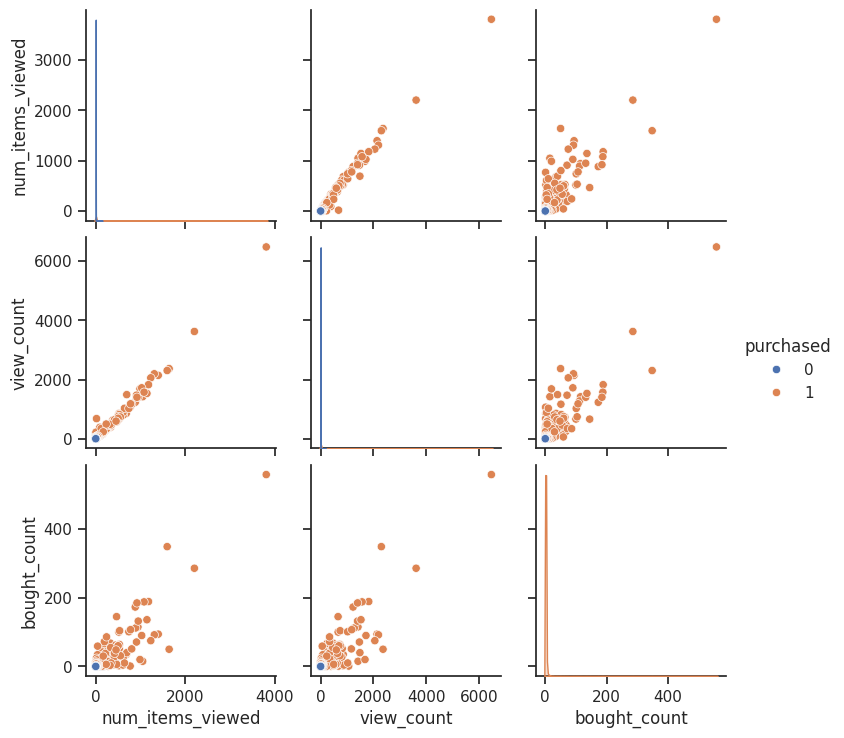

In [ ]:
#Plot the data
sns.pairplot(main_df, x_vars = ['num_items_viewed', 'view_count', 'bought_count'],
             y_vars = ['num_items_viewed', 'view_count', 'bought_count'],  hue = 'purchased')

<ipython-input-4-972f418a20b9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=events, x='day_of_week', order=events['day_of_week'].value_counts().index,palette="rocket")
<ipython-input-4-972f418a20b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=events, x='hour', order=events['hour'].value_counts().index,palette="rocket")


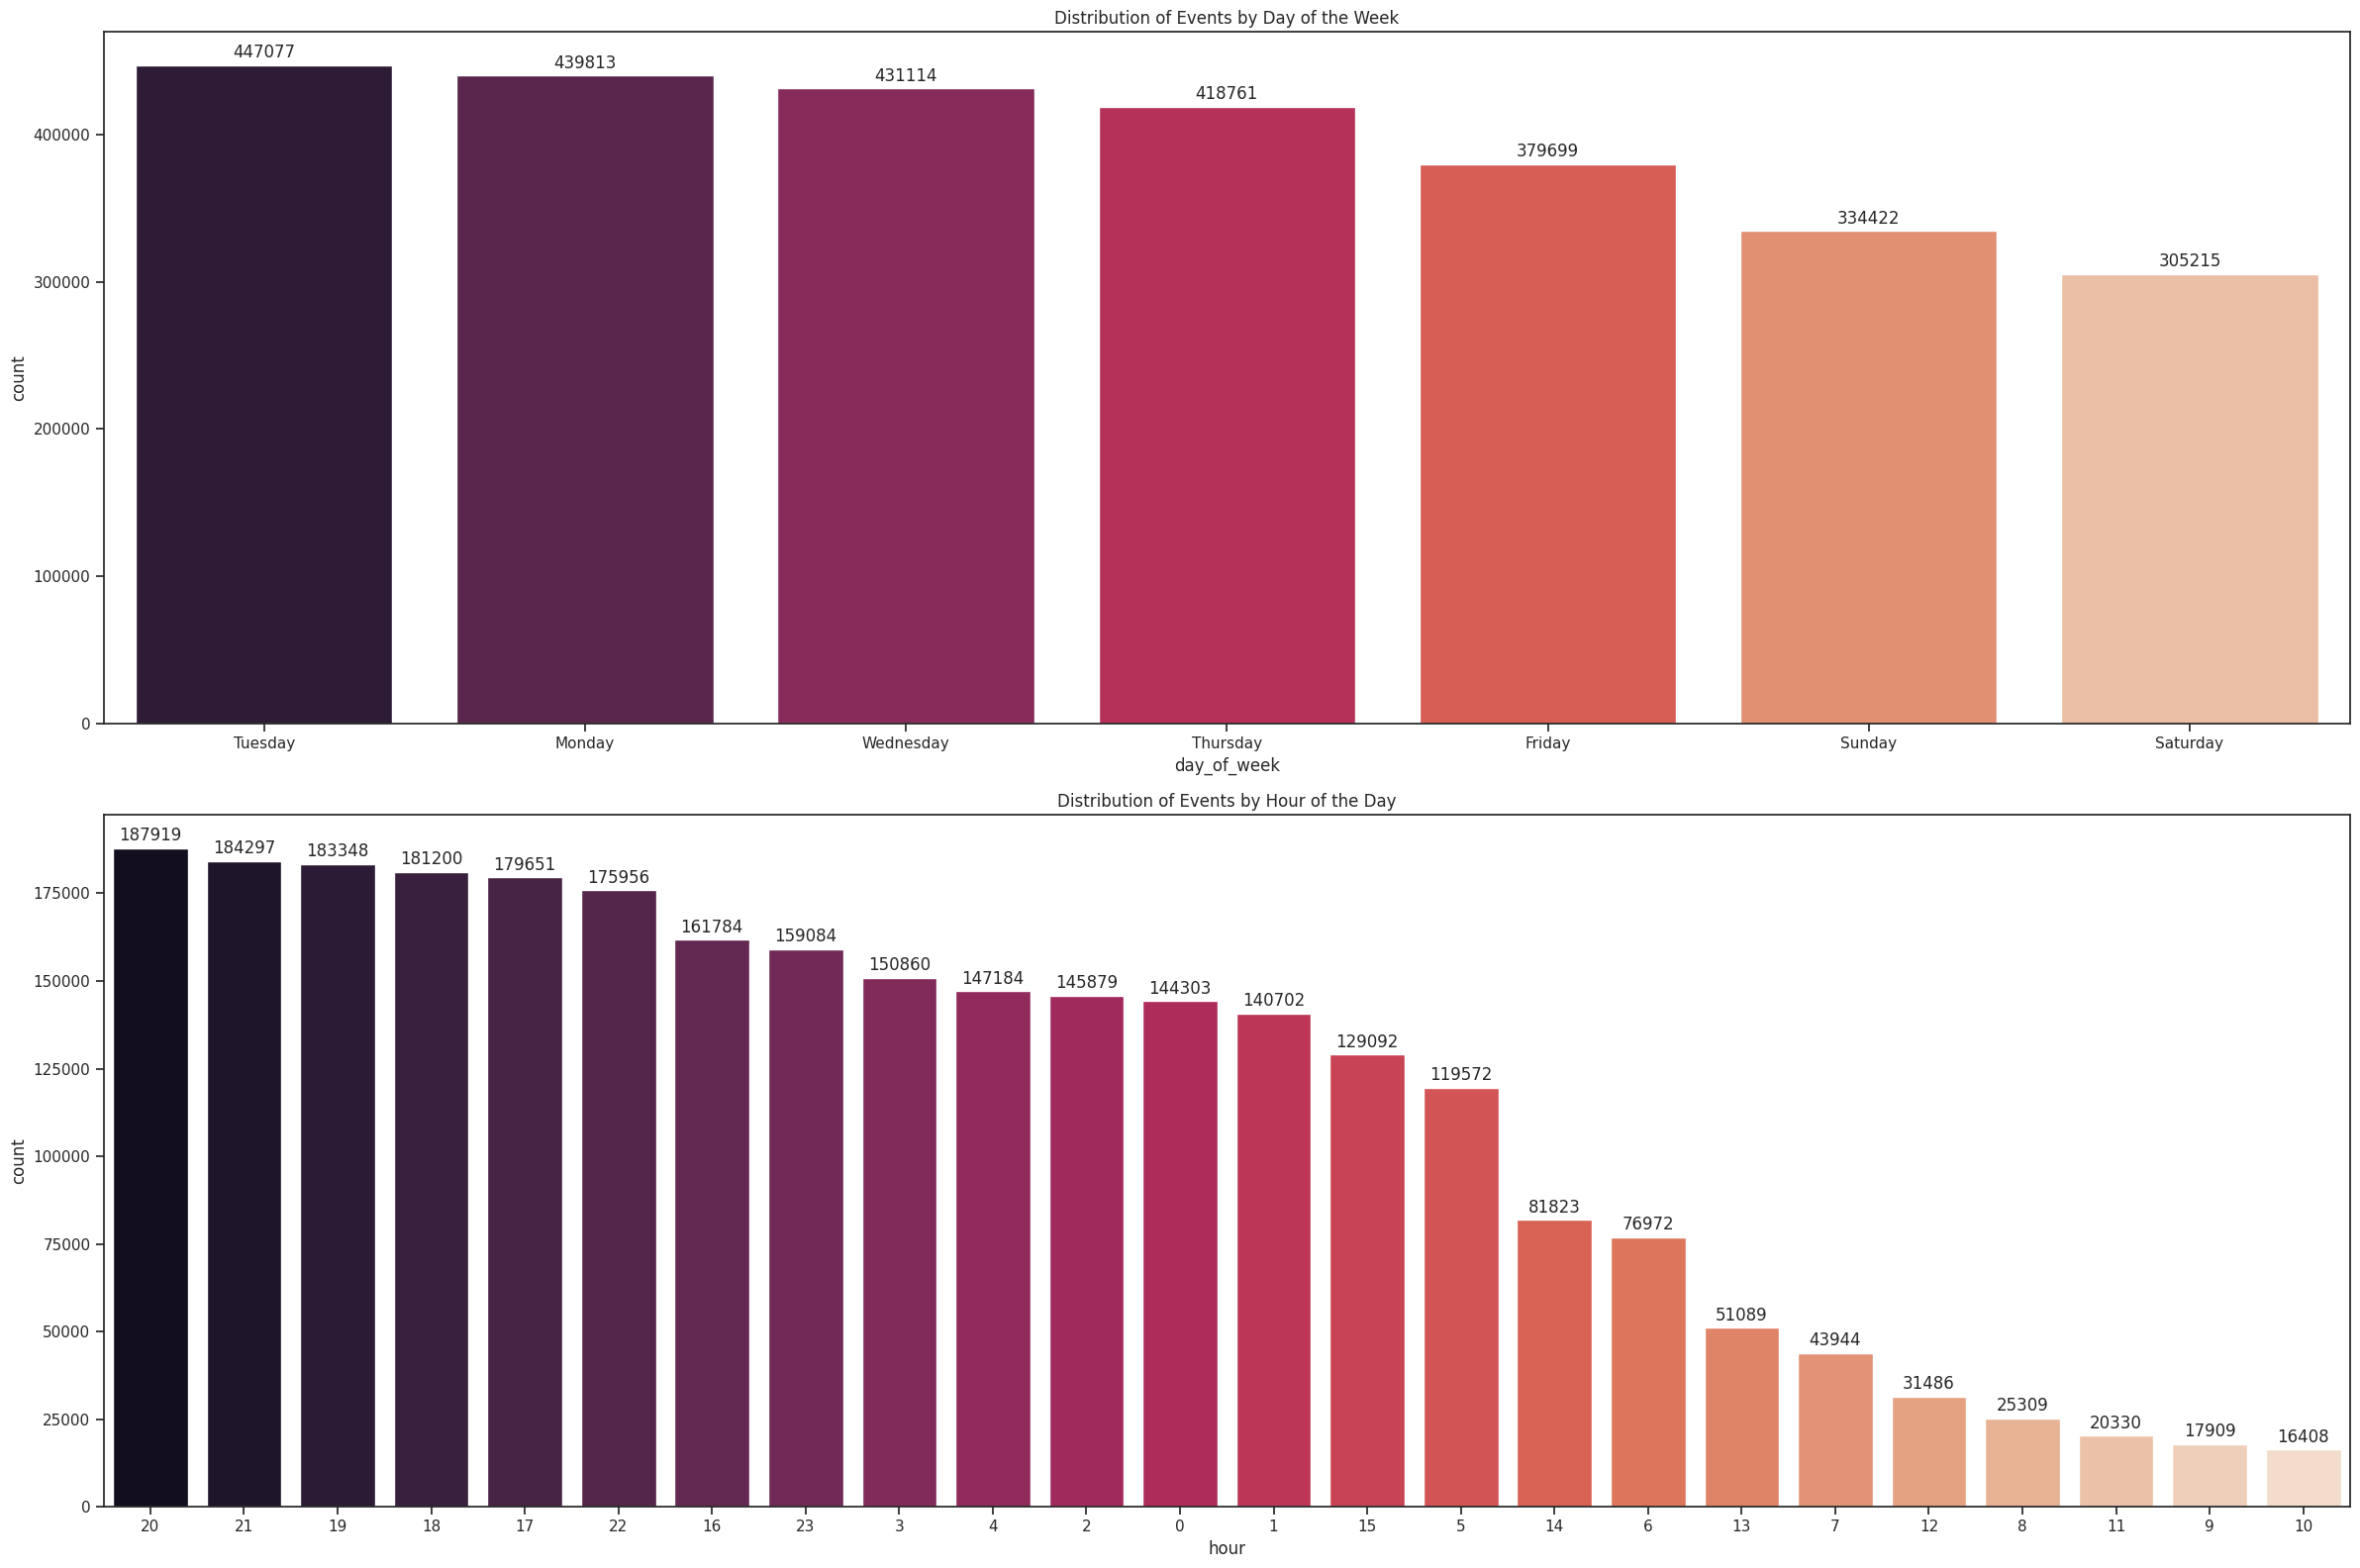

In [ ]:
 # distribution of events by day of the week and hour of the day.
events['day_of_week'] = events['timestamp'].dt.day_name()
events['hour'] = events['timestamp'].dt.hour

plt.figure(figsize=(24, 16))

plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=events, x='day_of_week', order=events['day_of_week'].value_counts().index,palette="rocket")
plt.title('Distribution of Events by Day of the Week')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.subplot(2, 1, 2)
ax2 = sns.countplot(data=events, x='hour', order=events['hour'].value_counts().index,palette="rocket")
plt.title('Distribution of Events by Hour of the Day')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Events over time
events_daily = events.resample('D', on='timestamp').count()
events_daily

,visitorid,event,itemid,transactionid,day_of_week,hour
timestamp,,,,,,
2015-05-03,13683,13683,13683,83,13683,13683
2015-05-04,19414,19414,19414,154,19414,19414
2015-05-05,23015,23015,23015,225,23015,23015
2015-05-06,23920,23920,23920,258,23920,23920
2015-05-07,23164,23164,23164,217,23164,23164
...,...,...,...,...,...,...
2015-09-14,20913,20913,20913,154,20913,20913
2015-09-15,20427,20427,20427,158,20427,20427
2015-09-16,11495,11495,11495,137,11495,11495


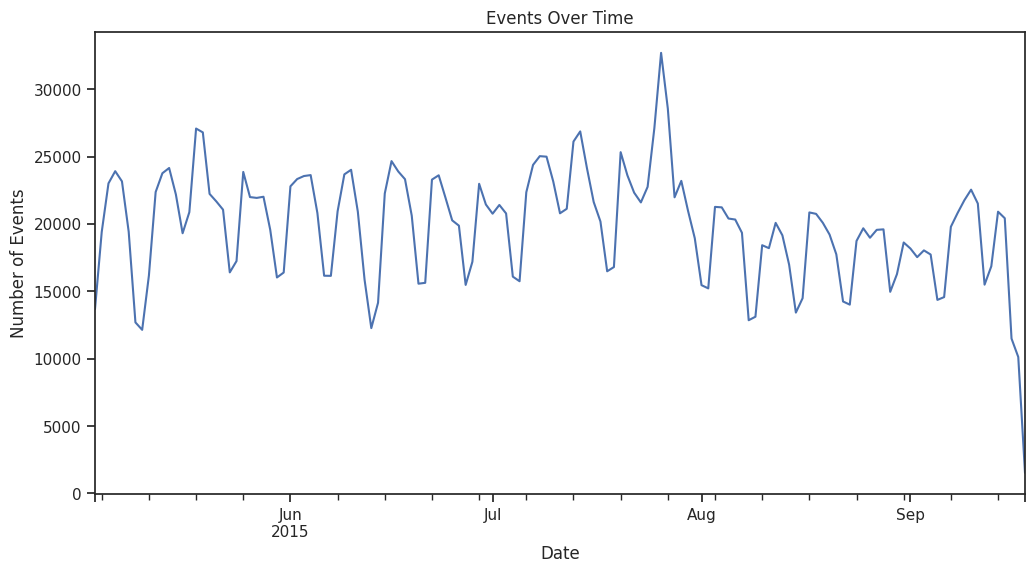

In [ ]:
# 2. Events over time plot

plt.figure(figsize=(12, 6))
events_daily['event'].plot()
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,day_of_week,hour
1361687,2015-09-11 20:49:49.439,0,view,285930,NaN,Friday,20
1367212,2015-09-11 20:52:39.591,0,view,357564,NaN,Friday,20
1367342,2015-09-11 20:55:17.175,0,view,67045,NaN,Friday,20
830385,2015-08-13 17:46:06.444,1,view,72028,NaN,Thursday,17
742616,2015-08-07 17:51:44.567,2,view,325215,NaN,Friday,17


In [ ]:
category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
items.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [ ]:
#Merge events with item properties and events
merged_events = events.merge(items,on=['itemid'],how='left')
merged_events.head()

In [ ]:
merged_events=merged_events.merge(category_tree, left_on='property', right_on='categoryid', how='left')
merged_events.head()

In [ ]:
merged_events.head()

In [ ]:
merged_events.info()

In [ ]:
#Correlation between user attributes and item attributes
user_item_merged = merged_events.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',
    'parentid': 'nunique',
})
print(user_item_merged.head().reset_index())

correlation_matrix = user_item_merged.corr()
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot =True,cmap ='coolwarm')
plt.title('Correlation between User Attributes and Item Attributes')
plt.show()

In [ ]:
#Add-to-cart to transaction conversion rate

add_to_cart = event_df[event_df['event'] == 'addtocart']
transactions = event_df[event_df['event'] == 'transaction']
conversion_rate = len(transactions) / len(add_to_cart)

print(f"Add-to-cart to transaction conversion rate: {conversion_rate:.2%}")

In [ ]:
df = merged_events.copy()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#lets take sample
np.random.seed(1)

rows_to_keep = np.random.choice(df.index, size=100000, replace=False)
sample_df = df.loc[rows_to_keep]

# Display the sampled DataFrame
sample_df